In [21]:
import requests
import json

# Replace with your own Azure Cognitive Services API key and endpoint
user_key = "YOUR_USER_KEY"
endpoint = "https://<Service Name>.cognitiveservices.azure.com"

# Define the local image file path
image_path = "image_path"

# Define the API endpoint

analyze_url = f"{endpoint}/computervision/imageanalysis:analyze?api-version=2023-02-01-preview&features=objects"

# Define the parameters for the API request
#params = {
#    "visualFeatures": "Objects",
#    "language": "en"
#}

# Define the headers for the API request
headers = {
    "Content-Type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": user_key
}

# Read the image file
with open(image_path, "rb") as image_file:
    image_data = image_file.read()

# Make the API request
response = requests.post(analyze_url, headers=headers, data=image_data)
print(response.json())



{'objectsResult': {'values': [{'boundingBox': {'x': 1556, 'y': 38, 'w': 451, 'h': 698}, 'tags': [{'name': 'bench', 'confidence': 0.585}]}, {'boundingBox': {'x': 604, 'y': 410, 'w': 1042, 'h': 893}, 'tags': [{'name': 'chair', 'confidence': 0.506}]}]}, 'modelVersion': '2023-02-01-preview', 'metadata': {'width': 2016, 'height': 1512}}


In [17]:
# Parse the response
result = response.json()

# Get the list of detected objects
objects = result.get("objects", [])

# Print the detected objects
for obj in objects:
    print(f"Object: {obj['object']} (Confidence: {obj['confidence']:.2f})")


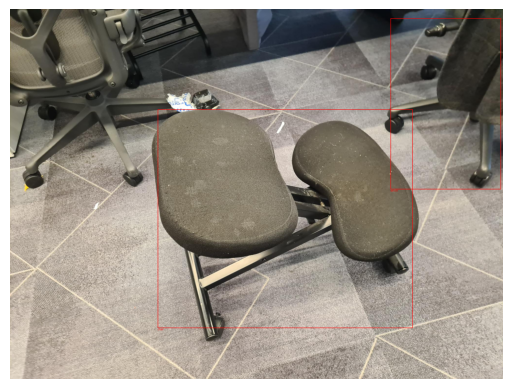

In [7]:
import os
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import matplotlib.pyplot as plt
# Azure Vision API endpoint and subscription key

subscription_key = "YOUR_USER_KEY"
endpoint = "https://<ServiceName>.cognitiveservices.azure.com"

analyze_url = f"{endpoint}/vision/v3.1/analyze"

# Function to analyze an image using Azure Vision API
def analyze_image(image_path):
    headers = {'Ocp-Apim-Subscription-Key': subscription_key,
               'Content-Type': 'application/octet-stream'}
    params = {'visualFeatures': 'Objects'}
    image_data = open(image_path, "rb").read()
    response = requests.post(analyze_url, headers=headers, params=params, data=image_data)
    response.raise_for_status()
    return response.json()

# Function to draw bounding boxes and labels on the image
def draw_boxes(image_path, objects):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for obj in objects:
        rect = obj['rectangle']
        left = rect['x']
        top = rect['y']
        right = left + rect['w']
        bottom = top + rect['h']
        draw.rectangle([left, top, right, bottom], outline="red", width=2)
        draw.text((left, bottom), obj['object'], fill="red", font=font)

    return image

# User uploads an image (e.g., "input_image.jpg")
user_uploaded_image =  "Image Path"

# Analyze the image using Azure Vision API
result = analyze_image(user_uploaded_image)

# Extract detected objects
objects = result.get('objects', [])

# Draw bounding boxes and labels on the image
output_image = draw_boxes(user_uploaded_image, objects)

# Save the output image
output_image_path = "output_image.jpg"
output_image.save(output_image_path)

# Print a success message
plt.imshow(output_image)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:

import os,time
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import matplotlib.pyplot as plt
# Azure Vision API endpoint and subscription key

subscription_key = "YOUR_USER_KEY"
endpoint = "https://<ServiceName>.cognitiveservices.azure.com"

analyze_url = f"{endpoint}/vision/v3.2/read/analyze?language=en"

# Function to analyze an image using Azure Vision API
def analyze_image(image_path):
    headers = {'Ocp-Apim-Subscription-Key': subscription_key,
               'Content-Type': 'application/octet-stream'}
   # params = {'visualFeatures': 'Objects'}
    image_data = open(image_path, "rb").read()
    response = requests.post(analyze_url, headers=headers, data=image_data)
    response.raise_for_status()
    return response.headers
    #return response.json()
# User uploads an image (e.g., "input_image.jpg")
#user_uploaded_image =  "/mnt/c/tmp/text.jpg"

response = analyze_image(user_uploaded_image)
Operation_Location = response["Operation-Location"]

print(Operation_Location)

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
for i in range(30):
    time.sleep(2)
    response=requests.get(Operation_Location,headers=headers)
    if response.json().get("status","") == 'running':
        continue 
    else:
        break

response.json()


{'status': 'succeeded',
 'createdDateTime': '2024-06-22T09:58:29Z',
 'lastUpdatedDateTime': '2024-06-22T09:58:30Z',
 'analyzeResult': {'version': '3.2.0',
  'modelVersion': '2022-04-30',
  'readResults': [{'page': 1,
    'angle': 0.1481,
    'width': 1280,
    'height': 720,
    'unit': 'pixel',
    'language': 'en',
    'lines': [{'boundingBox': [377, 19, 902, 20, 902, 63, 376, 59],
      'text': 'Professional Text Examples',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [377, 19, 614, 20, 614, 61, 377, 58],
        'text': 'Professional',
        'confidence': 0.991},
       {'boundingBox': [623, 20, 699, 20, 699, 62, 622, 61],
        'text': 'Text',
        'confidence': 0.988},
       {'boundingBox': [707, 20, 901, 20, 901, 64, 707, 62],
        'text': 'Examples',
        'confidence': 0.996}]},
     {'boundingBox': [332, 176, 615, 177, 615, 199, 332, 198],
      'text': 'Professional Text Examples',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [333, 177, 462, 177, 462, 199, 332, 198],
        'text': 'Professional',
        'confidence': 0.991},
       {'boundingBox': [466, 177, 508, 177, 508, 199, 466, 199],
        'text': 'Text',
        'confidence': 0.989},
       {'boundingBox': [512, 177, 613, 177, 613, 200, 512, 199],
        'text': 'Examples',
        'confidence': 0.996}]},
     {'boundingBox': [750, 167, 1136, 168, 1136, 186, 750, 185],
      'text': 'This slide is 100% editable. Adapt it to your needs and',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [750, 168, 780, 168, 781, 186, 751, 186],
        'text': 'This',
        'confidence': 0.998},
       {'boundingBox': [784, 168, 817, 168, 818, 186, 784, 186],
        'text': 'slide',
        'confidence': 0.996},
       {'boundingBox': [821, 168, 835, 168, 835, 186, 821, 186],
        'text': 'is',
        'confidence': 0.998},
       {'boundingBox': [839, 168, 878, 168, 878, 186, 839, 186],
        'text': '100%',
        'confidence': 0.991},
       {'boundingBox': [882, 168, 944, 168, 944, 187, 882, 186],
        'text': 'editable.',
        'confidence': 0.994},
       {'boundingBox': [947, 168, 989, 168, 989, 187, 948, 187],
        'text': 'Adapt',
        'confidence': 0.997},
       {'boundingBox': [993, 168, 1001, 168, 1001, 187, 993, 187],
        'text': 'it',
        'confidence': 0.997},
       {'boundingBox': [1005, 168, 1019, 168, 1019, 187, 1005, 187],
        'text': 'to',
        'confidence': 0.998},
       {'boundingBox': [1023, 168, 1055, 168, 1055, 187, 1023, 187],
        'text': 'your',
        'confidence': 0.989},
       {'boundingBox': [1059, 168, 1103, 168, 1103, 187, 1059, 187],
        'text': 'needs',
        'confidence': 0.991},
       {'boundingBox': [1107, 168, 1136, 169, 1136, 186, 1106, 187],
        'text': 'and',
        'confidence': 0.994}]},
     {'boundingBox': [750, 188, 987, 188, 987, 204, 750, 205],
      'text': "capture your audience's attention.",
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 189, 802, 189, 802, 206, 750, 206],
        'text': 'capture',
        'confidence': 0.994},
       {'boundingBox': [807, 189, 839, 188, 839, 206, 807, 206],
        'text': 'your',
        'confidence': 0.989},
       {'boundingBox': [843, 188, 920, 188, 920, 205, 842, 206],
        'text': "audience's",
        'confidence': 0.992},
       {'boundingBox': [923, 188, 988, 189, 987, 205, 923, 205],
        'text': 'attention.',
        'confidence': 0.955}]},
     {'boundingBox': [331, 316, 476, 316, 476, 336, 331, 336],
      'text': 'Add Text Here',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [332, 317, 370, 317, 370, 336, 332, 337],
        'text': 'Add',
        'confidence': 0.996},
       {'boundingBox': [379, 317, 421, 317, 421, 336, 379, 336],
        'text': 'Text',
        'confidence': 0.989},
       {'boundingBox': [424, 317, 472, 317, 473, 337, 425, 336],
        'text': 'Here',
        'confidence': 0.98}]},
     {'boundingBox': [750, 307, 1137, 308, 1137, 327, 750, 326],
      'text': 'This slide is 100% editable. Adapt it to your needs and',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 307, 780, 307, 780, 327, 750, 326],
        'text': 'This',
        'confidence': 0.998},
       {'boundingBox': [784, 307, 817, 308, 816, 327, 783, 327],
        'text': 'slide',
        'confidence': 0.996},
       {'boundingBox': [820, 308, 835, 308, 835, 327, 820, 327],
        'text': 'is',
        'confidence': 0.998},
       {'boundingBox': [839, 308, 878, 308, 878, 327, 839, 327],
        'text': '100%',
        'confidence': 0.99},
       {'boundingBox': [882, 308, 943, 308, 943, 328, 882, 327],
        'text': 'editable.',
        'confidence': 0.993},
       {'boundingBox': [947, 308, 989, 309, 988, 327, 947, 328],
        'text': 'Adapt',
        'confidence': 0.997},
       {'boundingBox': [992, 309, 1001, 309, 1001, 327, 992, 327],
        'text': 'it',
        'confidence': 0.997},
       {'boundingBox': [1005, 309, 1019, 309, 1019, 327, 1004, 327],
        'text': 'to',
        'confidence': 0.998},
       {'boundingBox': [1023, 309, 1055, 309, 1055, 327, 1023, 327],
        'text': 'your',
        'confidence': 0.989},
       {'boundingBox': [1059, 309, 1103, 309, 1103, 327, 1058, 327],
        'text': 'needs',
        'confidence': 0.997},
       {'boundingBox': [1107, 309, 1136, 309, 1136, 326, 1106, 326],
        'text': 'and',
        'confidence': 0.994}]},
     {'boundingBox': [206, 312, 206, 345, 184, 345, 184, 310],
      'text': '+',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [206, 320, 206, 334, 184, 334, 184, 320],
        'text': '+',
        'confidence': 0.652}]},
     {'boundingBox': [751, 328, 987, 328, 987, 345, 751, 346],
      'text': "capture your audience's attention.",
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 329, 802, 329, 803, 346, 751, 346],
        'text': 'capture',
        'confidence': 0.994},
       {'boundingBox': [806, 329, 839, 329, 840, 346, 806, 346],
        'text': 'your',
        'confidence': 0.989},
       {'boundingBox': [843, 329, 920, 328, 920, 346, 843, 346],
        'text': "audience's",
        'confidence': 0.995},
       {'boundingBox': [923, 328, 988, 328, 988, 346, 923, 346],
        'text': 'attention.',
        'confidence': 0.967}]},
     {'boundingBox': [330, 456, 475, 456, 475, 477, 330, 476],
      'text': 'Add Text Here',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [332, 456, 371, 456, 370, 477, 331, 477],
        'text': 'Add',
        'confidence': 0.996},
       {'boundingBox': [379, 456, 421, 456, 420, 477, 378, 477],
        'text': 'Text',
        'confidence': 0.991},
       {'boundingBox': [425, 457, 472, 457, 472, 477, 424, 477],
        'text': 'Here',
        'confidence': 0.989}]},
     {'boundingBox': [750, 446, 1135, 447, 1135, 465, 750, 464],
      'text': 'This slide is 100% editable. Adapt it to your needs and',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 447, 780, 447, 780, 465, 751, 465],
        'text': 'This',
        'confidence': 0.997},
       {'boundingBox': [784, 447, 817, 447, 817, 465, 784, 465],
        'text': 'slide',
        'confidence': 0.993},
       {'boundingBox': [820, 447, 836, 447, 836, 465, 820, 465],
        'text': 'is',
        'confidence': 0.998},
       {'boundingBox': [839, 447, 878, 447, 878, 465, 839, 465],
        'text': '100%',
        'confidence': 0.989},
       {'boundingBox': [882, 447, 944, 447, 944, 465, 882, 465],
        'text': 'editable.',
        'confidence': 0.994},
       {'boundingBox': [947, 447, 990, 447, 990, 466, 947, 465],
        'text': 'Adapt',
        'confidence': 0.997},
       {'boundingBox': [993, 447, 1002, 448, 1002, 466, 993, 466],
        'text': 'it',
        'confidence': 0.997},
       {'boundingBox': [1005, 448, 1019, 448, 1019, 466, 1005, 466],
        'text': 'to',
        'confidence': 0.998},
       {'boundingBox': [1023, 448, 1056, 448, 1056, 466, 1023, 466],
        'text': 'your',
        'confidence': 0.99},
       {'boundingBox': [1060, 448, 1103, 448, 1103, 466, 1060, 466],
        'text': 'needs',
        'confidence': 0.998},
       {'boundingBox': [1107, 448, 1136, 448, 1136, 466, 1107, 466],
        'text': 'and',
        'confidence': 0.994}]},
     {'boundingBox': [751, 467, 989, 467, 989, 484, 751, 484],
      'text': "capture your audience's attention.",
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 468, 802, 468, 802, 485, 751, 485],
        'text': 'capture',
        'confidence': 0.994},
       {'boundingBox': [807, 468, 839, 468, 839, 484, 807, 485],
        'text': 'your',
        'confidence': 0.989},
       {'boundingBox': [842, 468, 919, 468, 919, 484, 842, 484],
        'text': "audience's",
        'confidence': 0.995},
       {'boundingBox': [922, 468, 990, 468, 990, 485, 922, 484],
        'text': 'attention.',
        'confidence': 0.991}]},
     {'boundingBox': [195, 595, 212, 595, 213, 615, 196, 615],
      'text': '$',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [196, 595, 208, 595, 208, 615, 196, 615],
        'text': '$',
        'confidence': 0.943}]},
     {'boundingBox': [332, 595, 476, 595, 476, 615, 332, 615],
      'text': 'Add Text Here',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [333, 596, 371, 595, 371, 616, 333, 615],
        'text': 'Add',
        'confidence': 0.994},
       {'boundingBox': [379, 595, 422, 595, 422, 616, 379, 616],
        'text': 'Text',
        'confidence': 0.989},
       {'boundingBox': [426, 595, 472, 596, 472, 616, 426, 616],
        'text': 'Here',
        'confidence': 0.991}]},
     {'boundingBox': [751, 586, 1136, 587, 1135, 605, 751, 604],
      'text': 'This slide is 100% editable. Adapt it to your needs and',
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 587, 780, 587, 780, 604, 751, 604],
        'text': 'This',
        'confidence': 0.998},
       {'boundingBox': [784, 587, 817, 587, 817, 605, 784, 604],
        'text': 'slide',
        'confidence': 0.997},
       {'boundingBox': [821, 587, 836, 587, 836, 605, 820, 605],
        'text': 'is',
        'confidence': 0.998},
       {'boundingBox': [839, 587, 879, 587, 878, 605, 839, 605],
        'text': '100%',
        'confidence': 0.989},
       {'boundingBox': [882, 587, 944, 587, 943, 605, 882, 605],
        'text': 'editable.',
        'confidence': 0.994},
       {'boundingBox': [947, 587, 990, 587, 989, 606, 947, 605],
        'text': 'Adapt',
        'confidence': 0.997},
       {'boundingBox': [993, 587, 1001, 587, 1001, 606, 993, 606],
        'text': 'it',
        'confidence': 0.998},
       {'boundingBox': [1005, 587, 1019, 587, 1019, 606, 1005, 606],
        'text': 'to',
        'confidence': 0.998},
       {'boundingBox': [1023, 587, 1056, 588, 1055, 606, 1022, 606],
        'text': 'your',
        'confidence': 0.989},
       {'boundingBox': [1059, 588, 1103, 588, 1102, 606, 1059, 606],
        'text': 'needs',
        'confidence': 0.997},
       {'boundingBox': [1107, 588, 1135, 588, 1135, 606, 1106, 606],
        'text': 'and',
        'confidence': 0.994}]},
     {'boundingBox': [750, 607, 988, 607, 988, 623, 750, 624],
      'text': "capture your audience's attention.",
      'appearance': {'style': {'name': 'other', 'confidence': 0.972}},
      'words': [{'boundingBox': [751, 608, 803, 608, 803, 624, 751, 625],
        'text': 'capture',
        'confidence': 0.994},
       {'boundingBox': [807, 608, 839, 607, 839, 624, 806, 624],
        'text': 'your',
        'confidence': 0.991},
       {'boundingBox': [843, 607, 919, 607, 919, 624, 843, 624],
        'text': "audience's",
        'confidence': 0.993},
       {'boundingBox': [923, 607, 989, 607, 989, 623, 923, 624],
        'text': 'attention.',
        'confidence': 0.991}]}]}]}}

In [ ]:
# Cognite Northwuroe API endpoint and API key
northwuroe_api_key = "YOUR_USER_KEY"
northwuroe_endpoint = "https://<ServiceName>.cognitiveservices.azure.com/face/v1.0/detect?returnFaceId&returnFaceAttributes=headPose,glasses"

# Function to analyze an image using Cognite Northwuroe API
def analyze_northwuroe(image_path):
    headers = {'Ocp-Apim-Subscription-Key': northwuroe_api_key,
               'Content-Type': 'application/octet-stream'}
    image_data = open(image_path, "rb").read()
    response = requests.post(northwuroe_endpoint, headers=headers, data=image_data)
    response.raise_for_status()
    print(response)
    return response.json()

# Function to draw bounding boxes on the image
def draw_northwuroe(image_path, northwuroe):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for n in northwuroe:
        n_rectangle = n['faceRectangle']
        left = n_rectangle['left']
        top = n_rectangle['top']
        right = left + n_rectangle['width']
        bottom = top + n_rectangle['height']
        draw.rectangle([left, top, right, bottom], outline="green", width=2)

    return image
user_uploaded_image = "imagePath"
# Analyze the image using Cognite Northwuroe API
northwuroe_result = analyze_northwuroe(user_uploaded_image)
print(northwuroe_result)
# Draw bounding boxes on the image
output_northwuroe_image = draw_northwuroe(user_uploaded_image, northwuroe_result)

# Save the output image
output_northwuroe_image_path = "output_northwuroe_image.jpg"
output_northwuroe_image.save(output_northwuroe_image_path)

# Print a success message
plt.imshow(output_northwuroe_image)
plt.axis('off')  # Hide axes
plt.show()
